This script randomly generates image-text pair samples for each of the 6 categories ('TRUE', 'SATIRE/PARODY', 'FALSE_CONNECTION', 'IMPOSTER_CONTENT', 'MANIPULATED_CONTENT', 'MISLEADING_CONTENT') from train, test and validate batches on a specific topic (covid19, climate_change, military_vehicles).


1.   Running block 2 will mount your Google Drive folders
2.   When running block 5, change CURRENT_FOLDER to where this script locates in your Google Drive. Change DATASET to one of "covid19", "climate_change" and "military_vehicles" to see images on different topics.
3. To generate different examples, run block 8 repeatedly.



In [2]:
import csv
import os
import PIL
import pandas as pd
import random
from IPython.display import display
from PIL import Image
from tqdm import tqdm, tqdm_notebook
from collections import defaultdict
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
tqdm.pandas()
class FakedditDataVisualizer(object):
    """Fakeddit data visualizer"""

    def __init__(self, tsv_file_path: str, image_dir: str):
        column_names = ["id", "text", "label"]
        self.labels = ['TRUE', 'SATIRE/PARODY', 'FALSE_CONNECTION', 'IMPOSTER_CONTENT', 'MANIPULATED_CONTENT', 'MISLEADING_CONTENT']

        self.tsv_file_path = tsv_file_path
        self.image_dir = image_dir

        # load dataframe
        self.df = pd.read_csv(tsv_file_path, sep='\t', encoding='utf-8')
        self.df["label"] = self.df["label"].progress_apply(lambda x: self.labels[x])

        # set image width and height for resizing
        self.image_width, self.image_height = 256, 256

        # convert to str
        for name in column_names:
            self.df[name] = self.df[name].astype(str)

    def __getitem__(self, idx):
        image = self.load_image(idx, resize=True)

        return {
            'image': image,
            'text': self.df["text"][idx],
            'label': self.df["label"][idx]
        }

    def __len__(self):
        return len(self.df)

    def load_image(self, idx, resize=False):
        filename = self.df['id'][idx]
        image_path = os.path.join(self.image_dir, f'{filename}.jpg')
        # open image
        image = Image.open(image_path)  # PIL image
        if resize:
            # resize to IMG_WIDTH x IMG_HEIGHT
            image = image.resize((self.image_width, self.image_height), PIL.Image.ANTIALIAS)
            # convert to RGB
            image = image.convert("RGB")
        return image

In [5]:
"""get ids for each label"""

# change CURRENT_FOLDER to where your "fakeddit" folder is located
CURRENT_FOLDER = "/content/drive/My Drive/lab/SemaFor Intent Detection/fakeddit"
# change DATASET to one of covid19, climate_change, and military_vehicles
DATASET = "climate_change"

tsv_dir = f"{CURRENT_FOLDER}/processed_data/fakeddit_{DATASET}"
batch_label_indices = defaultdict(lambda: defaultdict(list))
for batch in ["train", "test", "validate"]:
    with open(f"{tsv_dir}/{batch}.tsv", "r") as infile:
        tsv_reader = csv.DictReader(infile, delimiter="\t")
        idx = 0
        for row in tsv_reader:
            batch_label_indices[batch][int(row["label"])].append(idx)
            idx += 1

100%|██████████| 2887/2887 [00:00<00:00, 537626.23it/s]


==============Test==============
-------sample 1-------


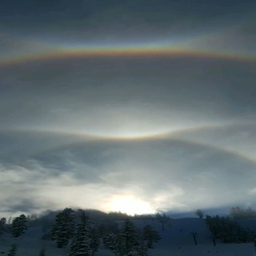

text: pentuple rainbow changing directions
label: TRUE
--------------

-------sample 2-------


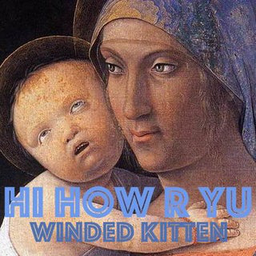

text: winded kitten hi how r yu
label: SATIRE/PARODY
--------------

-------sample 3-------


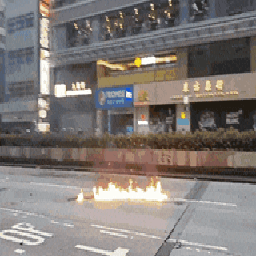

text: christopher nolan films the final act of the dark knight rises
label: FALSE_CONNECTION
--------------

-------sample 4-------


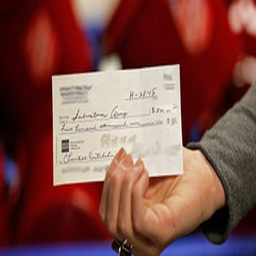

text: man allegedly put hot sauce in days and isnt sure where they are
label: IMPOSTER_CONTENT
--------------

-------sample 5-------


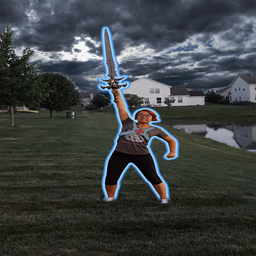

text: by the power of greyskull
label: MANIPULATED_CONTENT
--------------

-------sample 6-------


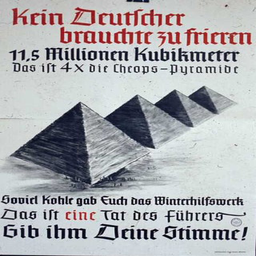

text: no german must freeze million cubic meters of coal have been provided by the winter relief that is times the volume of the great pyramid of cheops that is one of the fuhrers accomplishments give him your vote unknown author as far as im aware
label: MISLEADING_CONTENT
--------------




100%|██████████| 3030/3030 [00:00<00:00, 300159.21it/s]

==============Validate==============
-------sample 1-------


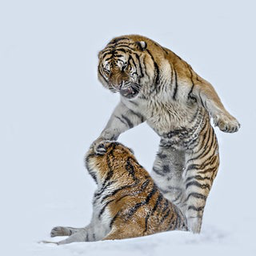

text: two tigers playing in the snow
label: TRUE
--------------

-------sample 2-------


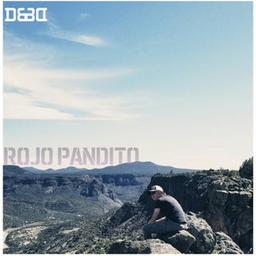

text: d d productions rojo pandito
label: SATIRE/PARODY
--------------

-------sample 3-------


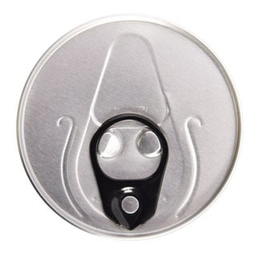

text: squid with a gas mask
label: FALSE_CONNECTION
--------------

-------sample 4-------


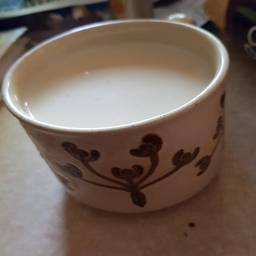

text: the two dumbest people in the alternate reality are powered by a pride of lions
label: IMPOSTER_CONTENT
--------------

-------sample 5-------


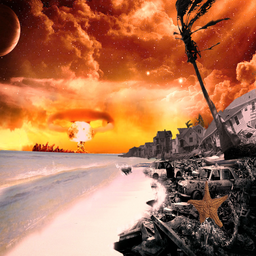

text: tropical nuke
label: MANIPULATED_CONTENT
--------------

-------sample 6-------


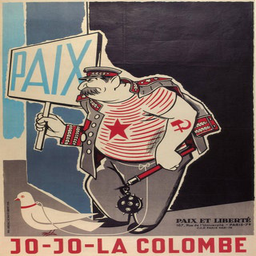

text: peace jojo the dove cold war poster by french anticommunist group paix et liberte depicting joseph stalin as claiming to want peace while being a thug in the background x
label: MISLEADING_CONTENT
--------------




In [9]:
for batch in ["test", "validate"]:
    tsv_file_path = f"{CURRENT_FOLDER}/processed_data/fakeddit_{DATASET}/{batch}.tsv"
    image_dir = f"{CURRENT_FOLDER}/selected_images/{batch}"
    visualizer = FakedditDataVisualizer(tsv_file_path=tsv_file_path, image_dir=image_dir)
    print(f"=============={batch.capitalize()}==============")
    for label in range(6):
        print(f"-------sample {label + 1}-------")
        sample_idx = random.choice(batch_label_indices[batch][label])
        sample = visualizer[sample_idx]
        display(sample["image"])
        for k, v in sample.items():
            if k != "image":
                print(f"{k}: {v}")
        print("--------------\n")
    print(f"============================\n")